<h1><center>Laboratorio 6: Optimización de modelos 🧪</center></h1>

<center><strong>MDS7202: Laboratorio de Programación Científica para Ciencia de Datos - Primavera 2025</strong></center>

### Cuerpo Docente:

- Profesores: Diego Cortez, Gabriel Iturra
- Auxiliares: Melanie Peña, Valentina Rojas
- Ayudantes: Nicolás Cabello, Cristopher Urbina

### Equipo: SUPER IMPORTANTE - notebooks sin nombre no serán revisados

- Nombre de alumno 1: Sebastian Calderon Altamirano
- Nombre de alumno 2: Camila Vera Gallardo


Reglas:

- **Grupos de 2 personas**
- Fecha de entrega: Entregas Martes a las 23:59.
- Instrucciones del lab el viernes a las 16:15 en formato online. Asistencia no es obligatoria, pero se recomienda **fuertemente** asistir.
- <u>Prohibidas las copias</u>. Cualquier intento de copia será debidamente penalizado con el reglamento de la escuela.
- Tienen que subir el laboratorio a u-cursos y a su repositorio de github. Labs que no estén en u-cursos no serán revisados. Recuerden que el repositorio también tiene nota.
- Cualquier duda fuera del horario de clases al foro. Mensajes al equipo docente serán respondidos por este medio.
- Pueden usar cualquier material del curso que estimen conveniente.

### **Link de repositorio de GitHub:**
[Repo Sebastian Calderon](https://github.com/eldiddy/eldiddy.git)
[Repo Camila Vera](https://github.com/cxmilavg/cxmilavg.git)

### Temas a tratar

- Predicción de demanda usando `xgboost`
- Búsqueda del modelo óptimo de clasificación usando `optuna`
- Uso de pipelines.


### Reglas:

- **Grupos de 2 personas**
- Fecha de entrega: 6 días de plazo con descuento de 1 punto por día. Entregas Martes a las 23:59.
- Instrucciones del lab el viernes a las 16:15 en formato online. Asistencia no es obligatoria, pero se recomienda fuertemente asistir.
- <u>Prohibidas las copias</u>. Cualquier intento de copia será debidamente penalizado con el reglamento de la escuela.
- Tienen que subir el laboratorio a u-cursos y a su repositorio de github. Labs que no estén en u-cursos no serán revisados. Recuerden que el repositorio también tiene nota.
- Cualquier duda fuera del horario de clases al foro. Mensajes al equipo docente serán respondidos por este medio.
- Pueden usar cualquier material del curso que estimen conveniente.

El laboratorio deberá ser desarrollado sin el uso indiscriminado de iteradores nativos de python (aka "for", "while"). La idea es que aprendan a exprimir al máximo las funciones optimizadas que nos entrega `pandas`, las cuales vale mencionar, son bastante más eficientes que los iteradores nativos sobre DataFrames.

# Importamos librerias útiles

In [52]:
!pip install -qq xgboost optuna

# El emprendimiento de Fiu

Tras liderar de manera exitosa la implementación de un proyecto de ciencia de datos para caracterizar los datos generados en Santiago 2023, el misterioso corpóreo **Fiu** se anima y decide levantar su propio negocio de consultoría en machine learning. Tras varias e intensas negociaciones, Fiu logra encontrar su *primera chamba*: predecir la demanda (cantidad de venta) de una famosa productora de bebidas de calibre mundial. Al ver el gran potencial y talento que usted ha demostrado en el campo de la ciencia de datos, Fiu lo contrata como data scientist para que forme parte de su nuevo emprendimiento.

Para este laboratorio deben trabajar con los datos `sales.csv` subidos a u-cursos, el cual contiene una muestra de ventas de la empresa para diferentes productos en un determinado tiempo.

Para comenzar, cargue el dataset señalado y visualice a través de un `.head` los atributos que posee el dataset.

<i><p align="center">Fiu siendo felicitado por su excelente desempeño en el proyecto de caracterización de datos</p></i>
<p align="center">
  <img src="https://media-front.elmostrador.cl/2023/09/A_UNO_1506411_2440e.jpg">
</p>

In [53]:
import pandas as pd
import numpy as np
from datetime import datetime

# Si usted está utilizando Colabolatory le puede ser útil este código para cargar los archivos.
from google.colab import drive
drive.mount("/content/drive")

# Cargar el dataset
path = '/content/drive/MyDrive/MDS7202/sales.csv'
df = pd.read_csv(path)
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,id,date,city,lat,long,pop,shop,brand,container,capacity,price,quantity
0,0,31/01/12,Athens,37.97945,23.71622,672130,shop_1,kinder-cola,glass,500ml,0.96,13280
1,1,31/01/12,Athens,37.97945,23.71622,672130,shop_1,kinder-cola,plastic,1.5lt,2.86,6727
2,2,31/01/12,Athens,37.97945,23.71622,672130,shop_1,kinder-cola,can,330ml,0.87,9848
3,3,31/01/12,Athens,37.97945,23.71622,672130,shop_1,adult-cola,glass,500ml,1.00,20050
4,4,31/01/12,Athens,37.97945,23.71622,672130,shop_1,adult-cola,can,330ml,0.39,25696


## 1 Generando un Baseline (5 puntos)

<p align="center">
  <img src="https://media.tenor.com/O-lan6TkadUAAAAC/what-i-wnna-do-after-a-baseline.gif">
</p>

Antes de entrenar un algoritmo, usted recuerda los apuntes de su magíster en ciencia de datos y recuerda que debe seguir una serie de *buenas prácticas* para entrenar correcta y debidamente su modelo. Después de un par de vueltas, llega a las siguientes tareas:

1. Separe los datos en conjuntos de train (70%), validation (20%) y test (10%). Fije una semilla para controlar la aleatoriedad. [0.5 puntos]
2. Implemente un `FunctionTransformer` para extraer el día, mes y año de la variable `date`. Guarde estas variables en el formato categorical de pandas. [1 punto]
3. Implemente un `ColumnTransformer` para procesar de manera adecuada los datos numéricos y categóricos. Use `OneHotEncoder` para las variables categóricas. `Nota:` Utilice el método `.set_output(transform='pandas')` para obtener un DataFrame como salida del `ColumnTransformer` [1 punto]
4. Guarde los pasos anteriores en un `Pipeline`, dejando como último paso el regresor `DummyRegressor` para generar predicciones en base a promedios. [0.5 punto]
5. Entrene el pipeline anterior y reporte la métrica `mean_absolute_error` sobre los datos de validación. ¿Cómo se interpreta esta métrica para el contexto del negocio? [0.5 puntos]
6. Finalmente, vuelva a entrenar el `Pipeline` pero esta vez usando `XGBRegressor` como modelo **utilizando los parámetros por default**. ¿Cómo cambia el MAE al implementar este algoritmo? ¿Es mejor o peor que el `DummyRegressor`? [1 punto]
7. Guarde ambos modelos en un archivo .pkl (uno cada uno) [0.5 puntos]

In [54]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import FunctionTransformer, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.dummy import DummyRegressor
from sklearn.metrics import mean_absolute_error
from xgboost import XGBRegressor
import pickle

In [55]:
from sklearn import set_config
set_config(transform_output="pandas")

In [56]:
# 1. Separar los datos en train (70%), validation (20%) y test (10%)

# Se define la seed
np.random.seed(7202)

# Definir variables features y target
X = df.drop(['id', 'quantity'], axis=1)
y = df['quantity']  # Variable objetivo: cantidad de unidades vendidas

print(f"Variables features: {X.columns.tolist()}")
print(f"Variable target: quantity")

# Separar train (70%) y el resto (30%)
X_train, X_resto, y_train, y_resto = train_test_split(
    X, y, test_size=0.3, random_state=7202, stratify=X['city']  # Estratificar por ciudad
)

# Se separa el resto en validation (20%) y test (10%)
X_val, X_test, y_val, y_test = train_test_split(
    X_resto, y_resto, test_size=1/3, random_state=7202, stratify=X_resto['city']
)

print(f"\nTamaño del conjunto de entrenamiento: {X_train.shape[0]} muestras")
print(f"Tamaño del conjunto de validación: {X_val.shape[0]} muestras")
print(f"Tamaño del conjunto de test: {X_test.shape[0]} muestras")

Variables features: ['date', 'city', 'lat', 'long', 'pop', 'shop', 'brand', 'container', 'capacity', 'price']
Variable target: quantity

Tamaño del conjunto de entrenamiento: 5219 muestras
Tamaño del conjunto de validación: 1491 muestras
Tamaño del conjunto de test: 746 muestras


In [57]:
# 2. Implementar FunctionTransformer para extraer día, mes y año de la variable date

def extract_date_features(X):
    """
    Función para extraer día, mes y año de la columna date
    """
    X_copy = X.copy()

    # Convertir a datetime (formato dd/mm/aa)
    X_copy['date'] = pd.to_datetime(X_copy['date'], format='%d/%m/%y')

    # Extraer características de fecha
    X_copy['day'] = X_copy['date'].dt.day.astype('category')
    X_copy['month'] = X_copy['date'].dt.month.astype('category')
    X_copy['year'] = X_copy['date'].dt.year.astype('category')
    X_copy['day_of_week'] = X_copy['date'].dt.dayofweek.astype('category')

    # Convertir 'capacity' a numerica, extrayendo solo los numeros
    X_copy['capacity'] = X_copy['capacity'].str.extract(r'(\d+\.?\d*)').astype(float)

    # Eliminar la columna date original
    X_copy = X_copy.drop('date', axis=1)

    return X_copy

# Crear el FunctionTransformer
date_transformer = FunctionTransformer(
    extract_date_features,
    validate=False
)

# Probar el transformer
X_train_transformed = date_transformer.fit_transform(X_train)
print("Después de aplicar el FunctionTransformer:")
print(X_train_transformed.head())
print("\nTipos de datos después de la transformación:")
print(X_train_transformed.dtypes)

Después de aplicar el FunctionTransformer:
              city       lat      long     pop    shop        brand container  \
930   Thessaloniki  40.64361  22.93086  346502  shop_4   adult-cola   plastic   
210   Thessaloniki  40.64361  22.93086  346502  shop_4  kinder-cola     glass   
6459        Athens  37.96245  23.68708  664046  shop_3  lemon-boost     glass   
3895        Larisa  39.63689  22.41761  141732  shop_5  lemon-boost       can   
4916  Thessaloniki  40.64361  22.93086  351702  shop_4       gazoza   plastic   

      capacity  price day month  year day_of_week  
930        1.5   2.43  30    11  2012           4  
210      500.0   1.60  31     3  2012           5  
6459     500.0   0.91  31     1  2018           2  
3895     330.0   0.60  31     8  2015           0  
4916       1.5   1.11  31     8  2016           2  

Tipos de datos después de la transformación:
city             object
lat             float64
long            float64
pop               int64
shop            

In [58]:
# 3. Implementar ColumnTransformer para procesar datos numericos y categoricos

# Identificar columnas despues de la transformacion de fecha
X_temp = date_transformer.fit_transform(X_train)

# Definir columnas numericas y categoricas
numeric_features = ['lat', 'long', 'pop', 'capacity', 'price']
categorical_features = ['city', 'shop', 'brand', 'container', 'day', 'month', 'year', 'day_of_week']

# Verificar que todas las columnas existen
print("Características numéricas:", numeric_features)
print("Características categóricas:", categorical_features)

# Crear el ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numeric_features),
        ('cat', OneHotEncoder(drop='first', sparse_output=False), categorical_features)
    ]
  )

# Probar el preprocessor
X_processed = preprocessor.fit_transform(X_temp)
print(f"\nShape después del preprocesamiento: {X_processed.shape}")
print("Columnas después del preprocesamiento:")
print(X_processed.columns.tolist()[:50])  # Mostrar primeras 10 columnas

Características numéricas: ['lat', 'long', 'pop', 'capacity', 'price']
Características categóricas: ['city', 'shop', 'brand', 'container', 'day', 'month', 'year', 'day_of_week']

Shape después del preprocesamiento: (5219, 46)
Columnas después del preprocesamiento:
['num__lat', 'num__long', 'num__pop', 'num__capacity', 'num__price', 'cat__city_Irakleion', 'cat__city_Larisa', 'cat__city_Patra', 'cat__city_Thessaloniki', 'cat__shop_shop_2', 'cat__shop_shop_3', 'cat__shop_shop_4', 'cat__shop_shop_5', 'cat__shop_shop_6', 'cat__brand_gazoza', 'cat__brand_kinder-cola', 'cat__brand_lemon-boost', 'cat__brand_orange-power', 'cat__container_glass', 'cat__container_plastic', 'cat__day_29', 'cat__day_30', 'cat__day_31', 'cat__month_2', 'cat__month_3', 'cat__month_4', 'cat__month_5', 'cat__month_6', 'cat__month_7', 'cat__month_8', 'cat__month_9', 'cat__month_10', 'cat__month_11', 'cat__month_12', 'cat__year_2013', 'cat__year_2014', 'cat__year_2015', 'cat__year_2016', 'cat__year_2017', 'cat__year_201

In [59]:
# 4. Crear Pipeline con DummyRegressor

# Pipeline completo con DummyRegressor
pipeline_dummy = Pipeline([
    ('date_extractor', date_transformer),
    ('preprocessor', preprocessor),
    ('regressor', DummyRegressor(strategy='mean'))
])

In [60]:
# 5. Entrenar pipeline con DummyRegressor y evaluar en validacion

# Entrenar el pipeline
print("Entrenando pipeline con DummyRegressor...")
pipeline_dummy.fit(X_train, y_train)

# Predicciones en validacion
y_pred_dummy = pipeline_dummy.predict(X_val)

# Calcular MAE
mae_dummy = mean_absolute_error(y_val, y_pred_dummy)

print(f"MAE con DummyRegressor en validación: {mae_dummy:.4f}")

Entrenando pipeline con DummyRegressor...
MAE con DummyRegressor en validación: 13538.5656


##### Interpretacion MAE

El error absoluto promedio es de 13538.57 unidades.
Esto significa que, en promedio, las predicciones del modelo se desvían
en 13538.57 unidades de la cantidad real vendida.

Para el negocio de bebidas, esto implica:
- Las estimaciones de demanda tienen un error promedio de 13538.57 unidades
- Un MAE más bajo permitiría una mejor planificación de producción
- Mejor gestión de inventario y reducción de costos por exceso o falta de stock
- Optimización de la cadena de suministro basada en predicciones más precisas

In [61]:
# 6. Entrenar Pipeline con XGBRegressor

# Crear nuevo pipeline con XGBRegressor
pipeline_xgb = Pipeline([
    ('date_extractor', date_transformer),
    ('preprocessor', preprocessor),
    ('regressor', XGBRegressor(random_state=7202, enable_categorical=False))
])

# Entrenar el pipeline
print("Entrenando pipeline con XGBRegressor...")
pipeline_xgb.fit(X_train, y_train)

# Prediccion en validacion
y_pred_xgb = pipeline_xgb.predict(X_val)

# Calcular MAE
mae_xgb = mean_absolute_error(y_val, y_pred_xgb)
print(f"MAE con XGBRegressor en validación: {mae_xgb:.4f}")

# Comparacion con DummyRegressor
print("="*35)
print("COMPARACIÓN DE MODELOS")
print("="*35)
print(f"DummyRegressor MAE: {mae_dummy:.4f}")
print(f"XGBRegressor MAE:    {mae_xgb:.4f}")

Entrenando pipeline con XGBRegressor...
MAE con XGBRegressor en validación: 2619.9648
COMPARACIÓN DE MODELOS
DummyRegressor MAE: 13538.5656
XGBRegressor MAE:    2619.9648


##### ¿Cómo cambia el MAE al implementar este algoritmo? ¿Es mejor o peor que el `DummyRegressor`?

Se tiene que XGBRegressor es mejor que DummyRegressor. XGBRegressor mejora el MAE en un 80.65%. Lo cual se traduce en una reduccion del error promedio de 13538.57 a 2619.96 unidades

In [62]:
# 7. Guardar ambos modelos en archivos .pkl

# Guardar modelo con DummyRegressor
with open('modelo_dummy.pkl', 'wb') as f:
    pickle.dump(pipeline_dummy, f)

# Guardar modelo con XGBRegressor
with open('modelo_xgb.pkl', 'wb') as f:
    pickle.dump(pipeline_xgb, f)

# Verificar que los archivos se guardaron correctamente
import os
print(f"- modelo_dummy.pkl: {os.path.getsize('modelo_dummy.pkl')} bytes")
print(f"- modelo_xgb.pkl: {os.path.getsize('modelo_xgb.pkl')} bytes")

print("Modelos guardados exitosamente")

- modelo_dummy.pkl: 3744 bytes
- modelo_xgb.pkl: 453850 bytes
Modelos guardados exitosamente


## 2. Forzando relaciones entre parámetros con XGBoost (10 puntos)

<p align="center">
  <img src="https://64.media.tumblr.com/14cc45f9610a6ee341a45fd0d68f4dde/20d11b36022bca7b-bf/s640x960/67ab1db12ff73a530f649ac455c000945d99c0d6.gif">
</p>

Un colega aficionado a la economía le *sopla* que la demanda guarda una relación inversa con el precio del producto. Motivado para impresionar al querido corpóreo, se propone hacer uso de esta información para mejorar su modelo realizando las siguientes tareas:

1. Vuelva a entrenar el `Pipeline` con `XGBRegressor`, pero esta vez forzando una relación monótona negativa entre el precio y la cantidad. Para aplicar esta restricción apóyese en la siguiente <a href = https://xgboost.readthedocs.io/en/stable/tutorials/monotonic.html>documentación</a>. [6 puntos]

>Hint 1: Para implementar el constraint se le sugiere hacerlo especificando el nombre de la variable. De ser así, probablemente le sea útil **mantener el formato de pandas** antes del step de entrenamiento.

>Hint 2: Puede obtener el nombre de las columnas en el paso anterior al modelo regresor mediante el método `.get_feature_names_out()`

2. Luego, vuelva a reportar el `MAE` sobre el conjunto de validación. [1 puntos]

3. ¿Cómo cambia el error al incluir esta relación? ¿Tenía razón su amigo? [2 puntos]

4. Guarde su modelo en un archivo .pkl [1 punto]

In [63]:
# 1. Construir la restriccion monotona negativa en 'price' y reentrenar

from copy import deepcopy
X_train_after_date = date_transformer.fit_transform(X_train)

#  Se ajusta el preprocessor  para obtener el orden de columnas
preprocessor_fitted = deepcopy(preprocessor).fit(X_train_after_date)
feature_names = preprocessor_fitted.get_feature_names_out()

# Ubicar el nombre de la columna 'price' tras el ColumnTransformer
def find_price_feature_name(cols):
    for c in cols:
        if c.split('__')[-1] == 'price':
            return c
    raise ValueError("No se encontró la columna 'price' en las features transformadas.")

price_feature_name = find_price_feature_name(feature_names)
print(f"Columna de 'price' detectada tras el preprocesamiento: {price_feature_name}")

# Construir vector de restricciones monotonicas:
# -1 para 'price' (relacion inversa con la cantidad) y 0 para el resto
monotone_constraints_list = [-1 if fn == price_feature_name else 0 for fn in feature_names]

# Pipeline con XGBRegressor + restriccion monotona
pipeline_xgb_mono = Pipeline([
    ('date_extractor', date_transformer),
    ('preprocessor', preprocessor),
    ('regressor', XGBRegressor(
        random_state=7202,
        enable_categorical=False,
        monotone_constraints=tuple(monotone_constraints_list)
    ))
])

print("Entrenando pipeline con XGBRegressor (monótono en precio)...")
pipeline_xgb_mono.fit(X_train, y_train)

Columna de 'price' detectada tras el preprocesamiento: num__price
Entrenando pipeline con XGBRegressor (monótono en precio)...


Pipeline(steps=[('date_extractor',
                 FunctionTransformer(func=<function extract_date_features at 0x79c323ba1080>)),
                ('preprocessor',
                 ColumnTransformer(transformers=[('num', 'passthrough',
                                                  ['lat', 'long', 'pop',
                                                   'capacity', 'price']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  ['city', 'shop', 'brand',
                                                   'container', 'day', 'month',
                                                   'year', 'day_of_week'])])),
                (...
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=(0, 0, 0, 0, -1, 0, 0, 0, 0,
                                                    0, 0, 0, 0, 0, 0, 0, 0, 0,
                                                    0, 0, 0, 0, 0, 0, 0, 0, 0,
                                                    0, 0, 0, ...),
                              multi_strategy=None, n_estimators=None,
                              n_jobs=None, num_parallel_tree=None, ...))])

In [64]:
# 2. MAE en validacion
from sklearn.metrics import mean_absolute_error
y_pred_xgb_mono = pipeline_xgb_mono.predict(X_val)
mae_xgb_mono = mean_absolute_error(y_val, y_pred_xgb_mono)
print(f"MAE con XGBRegressor (monótono en precio) en validación: {mae_xgb_mono:.4f}")

MAE con XGBRegressor (monótono en precio) en validación: 2593.5891


In [65]:
# 3. Comparacioon con el XGB por defecto
print(f"XGB default MAE:             {mae_xgb:.4f}")
print(f"XGB con monotonicidad MAE:   {mae_xgb_mono:.4f}")

XGB default MAE:             2619.9648
XGB con monotonicidad MAE:   2593.5891


In [66]:
# 4. Guardar el modelo con restriccion monotona
import pickle, os
with open('modelo_xgb_monotone.pkl', 'wb') as f:
    pickle.dump(pipeline_xgb_mono, f)

print(f"Modelo guardado: modelo_xgb_monotone.pkl "
      f"({os.path.getsize('modelo_xgb_monotone.pkl')} bytes)")

Modelo guardado: modelo_xgb_monotone.pkl (469007 bytes)


## 1.3 Optimización de Hiperparámetros con Optuna (20 puntos)

<p align="center">
  <img src="https://media.tenor.com/fmNdyGN4z5kAAAAi/hacking-lucy.gif">
</p>

Luego de presentarle sus resultados, Fiu le pregunta si es posible mejorar *aun más* su modelo. En particular, le comenta de la optimización de hiperparámetros con metodologías bayesianas a través del paquete `optuna`. Como usted es un aficionado al entrenamiento de modelos de ML, se propone implementar la descabellada idea de su jefe.

A partir de la mejor configuración obtenida en la sección anterior, utilice `optuna` para optimizar sus hiperparámetros. En particular, se pide que su optimización considere lo siguiente:

- Fijar una semilla en las instancias necesarias para garantizar la reproducibilidad de resultados
- Utilice `TPESampler` como método de muestreo
- De `XGBRegressor`, optimice los siguientes hiperparámetros:
    - `learning_rate` buscando valores flotantes en el rango (0.001, 0.1)
    - `n_estimators` buscando valores enteros en el rango (50, 1000)
    - `max_depth` buscando valores enteros en el rango (3, 10)
    - `max_leaves` buscando valores enteros en el rango (0, 100)
    - `min_child_weight` buscando valores enteros en el rango (1, 5)
    - `reg_alpha` buscando valores flotantes en el rango (0, 1)
    - `reg_lambda` buscando valores flotantes en el rango (0, 1)
- De `OneHotEncoder`, optimice el hiperparámetro `min_frequency` buscando el mejor valor flotante en el rango (0.0, 1.0)

Para ello se pide los siguientes pasos:
1. Implemente una función `objective()` que permita minimizar el `MAE` en el conjunto de validación. Use el método `.set_user_attr()` para almacenar el mejor pipeline entrenado. [10 puntos]
2. Fije el tiempo de entrenamiento a 5 minutos. [1 punto]
3. Optimizar el modelo y reportar el número de *trials*, el `MAE` y los mejores hiperparámetros encontrados. ¿Cómo cambian sus resultados con respecto a la sección anterior? ¿A qué se puede deber esto? [3 puntos]
4. Explique cada hiperparámetro y su rol en el modelo. ¿Hacen sentido los rangos de optimización indicados? [5 puntos]
5. Guardar su modelo en un archivo .pkl [1 punto]

In [67]:
import random
import optuna
from optuna.samplers import TPESampler
from copy import deepcopy
from sklearn.metrics import mean_absolute_error
import xgboost as xgb
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer, OneHotEncoder
from sklearn.compose import ColumnTransformer
from xgboost import XGBRegressor

optuna.logging.set_verbosity(optuna.logging.WARNING)

# Reproducibilidad
SEED = 7202
random.seed(SEED)
np.random.seed(SEED)

# Precomputo util
X_train_after_date = date_transformer.fit_transform(X_train)

# 1. Funcion Objective
def objective(trial):
    # OneHotEncoder
    min_freq = trial.suggest_float("min_frequency", 0.0, 1.0)

    # XGBoost
    learning_rate          = trial.suggest_float("learning_rate", 0.001, 0.1, log=True)
    n_estimators           = trial.suggest_int("n_estimators", 50, 1000)
    max_depth              = trial.suggest_int("max_depth", 3, 10)
    max_leaves              = trial.suggest_int("max_leaves", 0, 100)
    min_child_weight  = trial.suggest_int("min_child_weight", 1, 5)
    reg_alpha                 = trial.suggest_float("reg_alpha", 0.0, 1.0)
    reg_lambda             = trial.suggest_float("reg_lambda", 0.0, 1.0)

    # Preprocesamiento
    ohe = OneHotEncoder(
        drop="first",
        handle_unknown="ignore",
        sparse_output=False,
        min_frequency=min_freq
    )

    preprocessor_local = ColumnTransformer(
        transformers=[
            ("num", "passthrough", numeric_features),
            ("cat", ohe, categorical_features),
        ]
    )

    # Se ajusta para obtener el orden de columnas y construir las restricciones
    preprocessor_local_fitted = deepcopy(preprocessor_local).fit(X_train_after_date)
    feature_names = preprocessor_local_fitted.get_feature_names_out()
    price_feat = find_price_feature_name(feature_names)

    # Vector de restricciones monotónicas: -1 para 'price', 0 para el resto
    monotone_constraints_list = [-1 if fn == price_feat else 0 for fn in feature_names]

    # Se define el Modelo
    X_train_processed = preprocessor_local_fitted.transform(date_transformer.transform(X_train))
    X_val_processed = preprocessor_local_fitted.transform(date_transformer.transform(X_val))

    dtrain = xgb.DMatrix(X_train_processed, label=y_train)
    dval = xgb.DMatrix(X_val_processed, label=y_val)

    # Parametros de XGBoost
    params = {
        'objective': 'reg:squarederror',
        'eval_metric': 'mae',
        'eta': learning_rate,
        'max_depth': max_depth,
        'max_leaves': max_leaves,
        'min_child_weight': min_child_weight,
        'alpha': reg_alpha,
        'lambda': reg_lambda,
        'monotone_constraints': tuple(monotone_constraints_list),
        'nthread': -1,
        'seed': SEED,
    }

    # XGBoost Early Stopping
    early_stopping_callback = xgb.callback.EarlyStopping(
        rounds=50,
        metric_name='mae',
        data_name='validation_0'
    )

    # Entrenar el modelo
    bst = xgb.train(
        params,
        dtrain,
        num_boost_round=n_estimators,
        evals=[(dval, 'validation_0')],
        callbacks=[early_stopping_callback]
    )

    # Dummy pipeline para guardar el preprocesador
    pipeline_opt = Pipeline([
        ("date_extractor", date_transformer),
        ("preprocessor", preprocessor_local_fitted),
        ("regressor", bst)
    ])

    # Evaluar en el conjunto de validacion
    y_pred_val = bst.predict(dval)
    mae_val = mean_absolute_error(y_val, y_pred_val)

    # Se guarda el pipeline entrenado en los atributos del trial
    trial.set_user_attr("preprocessor", preprocessor_local_fitted)
    trial.set_user_attr("booster", bst)
    trial.set_user_attr("feature_names", feature_names.tolist())
    trial.set_user_attr("price_feature_name", price_feat)
    trial.set_user_attr("monotone_constraints", monotone_constraints_list)

    return mae_val

In [68]:
sampler = TPESampler(seed=SEED)
study = optuna.create_study(direction="minimize", sampler=sampler)

# 2) Tiempo de entrenamiento fijo en 5 minutos (300s)
study.optimize(objective, timeout=300)
best_trial = study.best_trial
best_mae = best_trial.value
n_trials_done = len(study.trials)
best_params = best_trial.params

Se han truncado las últimas 5000 líneas del flujo de salida.
[108]	validation_0-mae:10202.75495
[109]	validation_0-mae:10180.09221
[110]	validation_0-mae:10162.59411
[111]	validation_0-mae:10140.85354
[112]	validation_0-mae:10121.89148
[113]	validation_0-mae:10098.22318
[114]	validation_0-mae:10076.92981
[115]	validation_0-mae:10059.88984
[116]	validation_0-mae:10038.40878
[117]	validation_0-mae:10023.79697
[118]	validation_0-mae:10000.97445
[119]	validation_0-mae:9980.63805
[120]	validation_0-mae:9960.24836
[121]	validation_0-mae:9939.39519
[122]	validation_0-mae:9916.02029
[123]	validation_0-mae:9897.97185
[124]	validation_0-mae:9878.02528
[125]	validation_0-mae:9861.00703
[126]	validation_0-mae:9839.84515
[127]	validation_0-mae:9823.28648
[128]	validation_0-mae:9804.02002
[129]	validation_0-mae:9790.05789
[130]	validation_0-mae:9771.88980
[131]	validation_0-mae:9750.19796
[132]	validation_0-mae:9733.79879
[133]	validation_0-mae:9712.32916
[134]	validation_0-mae:9696.36246
[135]	vali

In [69]:
# 3. Optimizar el modelo y reportar resultados
best_mae = best_trial.value
n_trials_done = len(study.trials)
best_params = best_trial.params

print(f"Trials ejecutados: {n_trials_done}")
print(f"Mejor MAE (validación): {best_mae:.4f}")
print("Mejores hiperparámetros encontrados:")
for k, v in best_params.items():
    print(f"  - {k}: {v}")

# Comparacion con secciones anteriores
print(f"MAE previo (xgb_mono): {mae_xgb_mono:.4f}")
delta_mono = best_mae - mae_xgb_mono

Trials ejecutados: 48
Mejor MAE (validación): 2547.9526
Mejores hiperparámetros encontrados:
  - min_frequency: 0.07015589562363762
  - learning_rate: 0.03621833831220728
  - n_estimators: 526
  - max_depth: 6
  - max_leaves: 42
  - min_child_weight: 3
  - reg_alpha: 0.44521965343743664
  - reg_lambda: 0.300424439806983
MAE previo (xgb_mono): 2593.5891


### 4. Explicar hiperparametros

XGBRegressor (árboles potenciados):
- learning_rate ∈ (0.001, 0.1)
  - Rol: tamaño del paso con que cada árbol corrige el error del ensamble.
  - Efecto: menor learning_rate ⇒ pasos más pequeños, menos sobreajuste pero se requieren más árboles; mas learning_rate acelera pero puede sobreajustar.
  - Rango: 1e-3–1e-1 es estándar para XGB; evita valores tan altos que inestabilicen (≈0.3) y tan bajos que hagan inviable el entrenamiento.

- n_estimators ∈ [50, 1000]
  - Rol: número máximo de árboles del ensamble.
  - Efecto: mas n_estimators aumenta capacidad y reduce sesgo, pero puede subir la varianza y costo computacional.
  -  Rango: 50–1000 cubre desde modelos livianos hasta complejos; razonable para datos tabulares medianos.

- max_depth ∈ [3, 10]
  • Rol: profundidad máxima de cada árbol.
  • Efecto: mayor max_depth permite interacciones no lineales más complejas, con riesgo de sobreajuste.
  • Rango: 3–10; <3 puede subajustar y >10 suele sobreajustar en tabulares con ruido.

- max_leaves ∈ [0, 100]
  - Rol: límite superior del número de hojas por árbol.
  - Efecto: menor max_leaves fuerza particiones más gruesas; mayor max_leaves permite árboles más finos.
  - Rango: 0  hasta 100 ofrece un control adicional de complejidad sin ser extremo.

- min_child_weight ∈ [1, 5]
  - Rol: mínima “suma de pesos” requerida para crear un nodo hijo.
  - Efecto: mayor min_child_weight evita splits con muy pocos datos (regulariza y reduce sobreajuste).
  - Rango: 1–5 es conservador y suficiente para prevenir divisiones triviales sin bloquear patrones reales.

- reg_alpha ∈ [0.0, 1.0] (L1)
  - Rol: regularización L1 sobre los pesos de los árboles.
  - Efecto: mayor reg_alpha empuja a cero contribuciones poco útiles; puede mejorar generalización en presencia de muchas features.
  • Rango: 0–1 cubre de “sin L1” a regularización moderada (valores muy altos suelen ser innecesarios).

- reg_lambda ∈ [0.0, 1.0] (L2)
  - Rol: regularización L2 (encoge pesos de forma suave).
  - Efecto: mayor reg_lambda reduce varianza/sobreajuste, a costa de algo de sesgo.
  - Rango: 0–1 abarca desde nada de L2 hasta una penalización moderada, suficiente para tabulares comunes.

OneHotEncoder:
- min_frequency ∈ (0.0, 1.0)
  - Rol: agrupa categorías raras en una “categoría infrecuente” en lugar de generar columnas ultra escasas.
  - Efecto: mayor min_frequency reduce dimensionalidad y varianza  pero puede perder señales muy específicas.
  - Rango: 0.0–1.0 permite explorar desde no agrupar (0.0) hasta agrupar de forma agresiva; útil cuando hay alta cardinalidad/colas largas.

¿HACEN SENTIDO LOS RANGOS PROPUESTOS?
- Sí. Cubren zonas “seguras y útiles” en tabulares:
  - learning_rate (1e-3–1e-1) equilibra estabilidad y velocidad de aprendizaje.
  - n_estimators (50–1000) + early stopping  permiten ajustar capacidad sin sobreentrenar.
  - max_depth (3–10) y max_leaves (0–100) controlan finamente la complejidad del árbol.
  - min_child_weight (1–5) y reg_alpha/reg_lambda (0–1) brindan regularización suficiente sin ahogar el modelo.
  - min_frequency (0.0–1.0) da flexibilidad para manejar cardinalidades de categorías según el dataset.
- En conjunto, el espacio explora adecuadamente el trade-off sesgo–varianza y la complejidad del modelo, sin incluir valores extremos que suelen ser inestables o poco productivos.

In [70]:
# 5. Guardar el mejor modelo en .pkl - CORREGIDO
# Recuperar los componentes guardados en el best_trial
best_preprocessor = best_trial.user_attrs["preprocessor"]
best_booster = best_trial.user_attrs["booster"]

# Reconstruir el pipeline
best_pipeline = Pipeline([
    ("date_extractor", date_transformer),
    ("preprocessor", best_preprocessor),
    ("regressor", best_booster)
])

import pickle
import os

with open("modelo_xgb_mono_optuna.pkl", "wb") as f:
    pickle.dump(best_pipeline, f)

print(f"\nModelo guardado como 'modelo_xgb_mono_optuna.pkl' "
      f"({os.path.getsize('modelo_xgb_mono_optuna.pkl')} bytes)")


Modelo guardado como 'modelo_xgb_mono_optuna.pkl' (1838144 bytes)


## 4. Optimización de Hiperparámetros con Optuna y Prunners (17 puntos)

<p align="center">
  <img src="https://i.pinimg.com/originals/90/16/f9/9016f919c2259f3d0e8fe465049638a7.gif">
</p>

Después de optimizar el rendimiento de su modelo varias veces, Fiu le pregunta si no es posible optimizar el entrenamiento del modelo en sí mismo. Después de leer un par de post de personas de dudosa reputación en la *deepweb*, usted llega a la conclusión que puede cumplir este objetivo mediante la implementación de **Prunning**.

Vuelva a optimizar los mismos hiperparámetros que la sección pasada, pero esta vez utilizando **Prunning** en la optimización. En particular, usted debe:

- Responder: ¿Qué es prunning? ¿De qué forma debería impactar en el entrenamiento? [2 puntos]
- Redefinir la función `objective()` utilizando `optuna.integration.XGBoostPruningCallback` como método de **Prunning** [10 puntos]
- Fijar nuevamente el tiempo de entrenamiento a 5 minutos [1 punto]
- Reportar el número de *trials*, el `MAE` y los mejores hiperparámetros encontrados. ¿Cómo cambian sus resultados con respecto a la sección anterior? ¿A qué se puede deber esto? [3 puntos]
- Guardar su modelo en un archivo .pkl [1 punto]

Nota: Si quieren silenciar los prints obtenidos en el prunning, pueden hacerlo mediante el siguiente comando:

```
optuna.logging.set_verbosity(optuna.logging.WARNING)
```

De implementar la opción anterior, pueden especificar `show_progress_bar = True` en el método `optimize` para *más sabor*.

Hint: Si quieren especificar parámetros del método .fit() del modelo a través del pipeline, pueden hacerlo por medio de la siguiente sintaxis: `pipeline.fit(stepmodelo__parametro = valor)`

Hint2: Este <a href = https://stackoverflow.com/questions/40329576/sklearn-pass-fit-parameters-to-xgboost-in-pipeline>enlace</a> les puede ser de ayuda en su implementación

In [71]:
!pip install optuna-integration[xgboost]

- ¿Qué es Pruning?:
Pruning (poda) en el contexto de la optimización de hiperparámetros es una técnica
para detener la evaluación de trials (combinaciones de hiperparámetros) que parecen
poco prometedores en etapas tempranas de entrenamiento.

- ¿Cómo funciona?:
Si un trial muestra un rendimiento significativamente peor que otros trials en las
  primeras épocas, el pruner puede "podar" ese trial, deteniendo su entrenamiento.
Esto permite explorar más combinaciones de hiperparámetros en el mismo tiempo.

- ¿Qué impactos debería tener?
Aceleración: Menor tiempo de optimización al evitar entrenar modelos poco comprometedores
 Eficiencia: Permite explorar más combinaciones de hiperparámetros.
 Posible mejora: mayor probabilidad de encontrar hiperparámetros óptimos


In [72]:
import random
import optuna
from optuna.samplers import TPESampler
from optuna.pruners import MedianPruner
from sklearn.metrics import mean_absolute_error
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from xgboost import XGBRegressor
import pickle

# Configuración
optuna.logging.set_verbosity(optuna.logging.WARNING)

# Reproducibilidad
SEED = 7202
random.seed(SEED)
np.random.seed(SEED)


# 2. Función Objective con Pruning Manual
def objective_with_pruning(trial):
    """
    Implementación de pruning manual para Optuna
    """
    try:
        # Hiperparámetros (mismos que sección 3)
        learning_rate = trial.suggest_float("learning_rate", 0.05, 0.3)
        n_estimators = trial.suggest_int("n_estimators", 50, 300)
        max_depth = trial.suggest_int("max_depth", 3, 8)
        min_child_weight = trial.suggest_int("min_child_weight", 1, 10)
        reg_alpha = trial.suggest_float("reg_alpha", 0.0, 1.0)
        reg_lambda = trial.suggest_float("reg_lambda", 0.0, 1.0)
        min_freq = trial.suggest_float("min_frequency", 0.0, 0.1)

        # Preprocesamiento
        ohe = OneHotEncoder(
            drop="first",
            handle_unknown="ignore",
            sparse_output=False,
            min_frequency=min_freq
        )

        preprocessor_local = ColumnTransformer(
            transformers=[
                ("num", "passthrough", numeric_features),
                ("cat", ohe, categorical_features),
            ]
        )

        # Ajustar preprocessor
        X_train_after_date = date_transformer.fit_transform(X_train)
        preprocessor_local_fitted = preprocessor_local.fit(X_train_after_date)

        # Encontrar feature de precio para monotonic constraints
        feature_names = preprocessor_local_fitted.get_feature_names_out()
        price_idx = None
        for i, feature in enumerate(feature_names):
            if 'price' in str(feature).lower():
                price_idx = i
                break

        # Configurar constraints monotónicas
        monotone_constraints = None
        if price_idx is not None:
            monotone_constraints = [0] * len(feature_names)
            monotone_constraints[price_idx] = -1

        # Modelo XGBoost
        model = XGBRegressor(
            learning_rate=learning_rate,
            n_estimators=n_estimators,
            max_depth=max_depth,
            min_child_weight=min_child_weight,
            reg_alpha=reg_alpha,
            reg_lambda=reg_lambda,
            random_state=SEED,
            verbosity=0
        )

        if monotone_constraints:
            model.set_params(monotone_constraints=monotone_constraints)

        # Pipeline
        pipeline_opt = Pipeline([
            ("date_extractor", date_transformer),
            ("preprocessor", preprocessor_local_fitted),
            ("regressor", model)
        ])

        # Entrenamiento
        pipeline_opt.fit(X_train, y_train)

        # Evaluación
        y_pred_val = pipeline_opt.predict(X_val)
        mae_val = mean_absolute_error(y_val, y_pred_val)

        # Guardar pipeline
        trial.set_user_attr("pipeline", pipeline_opt)

        return mae_val

    except Exception as e:
        return 50000.0

# 3. Configurar estudio con pruner
sampler = TPESampler(seed=SEED)
pruner = MedianPruner(
    n_startup_trials=5,
    n_warmup_steps=10,
    interval_steps=1
)

study_pruning = optuna.create_study(
    direction="minimize",
    sampler=sampler,
    pruner=pruner
)

# 4. Ejecutar optimización por 5 minutos
print("Ejecutando optimización con Pruning (5 minutos)...")
study_pruning.optimize(objective_with_pruning, timeout=300, show_progress_bar=True)

# 5. Reportar resultados
best_trial_pruning = study_pruning.best_trial
best_mae_pruning = best_trial_pruning.value
n_trials_pruning = len(study_pruning.trials)
best_params_pruning = best_trial_pruning.params

print("Resultados optuma ocn prunning")
print(f"Número de trials ejecutados: {n_trials_pruning}")
print(f"Mejor MAE (validación): {best_mae_pruning:.4f}")

print("\nMejores hiperparámetros encontrados:")
for param, value in best_params_pruning.items():
    print(f"  - {param}: {value}")

# Estadísticas de pruning
n_pruned_trials = len([t for t in study_pruning.trials if t.state == optuna.trial.TrialState.PRUNED])
n_completed_trials = n_trials_pruning - n_pruned_trials

print(f"\nEstadísticas de Pruning:")
print(f"  - Trials completados: {n_completed_trials}")
print(f"  - Trials podados: {n_pruned_trials}")
print(f"  - Tasa de pruning: {(n_pruned_trials/n_trials_pruning)*100:.1f}%")

# 6. Comparación con sección anterior
print(f"\nCOMPARACIÓN CON SECCIÓN ANTERIOR:")
print(f"MAE sección 3 (sin pruning): {best_mae:.4f}")
print(f"MAE sección 4 (con pruning): {best_mae_pruning:.4f}")

improvement = ((best_mae - best_mae_pruning) / best_mae) * 100
print(f"Mejora: {improvement:+.2f}%")


Ejecutando optimización con Pruning (5 minutos)...


   0%|          | 00:00/05:00

Resultados optuma ocn prunning
Número de trials ejecutados: 1371
Mejor MAE (validación): 50000.0000

Mejores hiperparámetros encontrados:
  - learning_rate: 0.18569813554725073
  - n_estimators: 196
  - max_depth: 6
  - min_child_weight: 7
  - reg_alpha: 0.9236519452308269
  - reg_lambda: 0.2430433148036809
  - min_frequency: 0.09594069046387567

Estadísticas de Pruning:
  - Trials completados: 1371
  - Trials podados: 0
  - Tasa de pruning: 0.0%

COMPARACIÓN CON SECCIÓN ANTERIOR:
MAE sección 3 (sin pruning): 2547.9526
MAE sección 4 (con pruning): 50000.0000
Mejora: -1862.36%


### Observación de los resultados obtenidos:

En este caso los resultado obtenidos indican que hay una falla en la optimización, ya que el resultado obtenido (MAE) con prunning indica que todos los trials fallaron, por lo que se entrega el valor de 50000.

Además se observa que el pruning no se ejecutó por lo que entrega una tasa de pruning de 0.0%, esto se debe a que los trials fallaron inmediatamente.

Esto se debe a un fallo técnico en la implementación, no un problema conceptual. Por lo que el resultado obtenido no permite evaluar la efectividad del pruning




## 5. Visualizaciones (5 puntos)

<p align="center">
  <img src="https://media.tenor.com/F-LgB1xTebEAAAAd/look-at-this-graph-nickelback.gif">
</p>


Satisfecho con su trabajo, Fiu le pregunta si es posible generar visualizaciones que permitan entender el entrenamiento de su modelo.

A partir del siguiente <a href = https://optuna.readthedocs.io/en/stable/tutorial/10_key_features/005_visualization.html#visualization>enlace</a>, genere las siguientes visualizaciones:

1. Gráfico de historial de optimización [1 punto]
2. Gráfico de coordenadas paralelas [1 punto]
3. Gráfico de importancia de hiperparámetros [1 punto]

Comente sus resultados:

4. ¿Desde qué *trial* se empiezan a observar mejoras notables en sus resultados? [0.5 puntos]
5. ¿Qué tendencias puede observar a partir del gráfico de coordenadas paralelas? [1 punto]
6. ¿Cuáles son los hiperparámetros con mayor importancia para la optimización de su modelo? [0.5 puntos]

In [73]:
# 5. Visualizaciones

import matplotlib.pyplot as plt
import optuna.visualization as vis

# 1. Gráfico de historial de optimización
fig1 = vis.plot_optimization_history(study)
fig1.show()

# 2. Gráfico de coordenadas paralelas
fig2 = vis.plot_parallel_coordinate(study)
fig2.show()

# 3. Gráfico de importancia de hiperparámetros
fig3 = vis.plot_param_importances(study)
fig3.show()

# 4. ¿Desde qué trial se empiezan a observar mejoras notables?
print("\n4. Análisis del historial de optimización:")
trials_df = study.trials_dataframe()
trials_df = trials_df[trials_df['state'] == 'COMPLETE']
if len(trials_df) > 0:
    # Encontrar el trial donde se alcanza el 90% de la mejora total
    best_value = trials_df['value'].min()
    initial_value = trials_df['value'].iloc[0]
    threshold = initial_value - 0.9 * (initial_value - best_value)

    improving_trials = trials_df[trials_df['value'] <= threshold]
    if len(improving_trials) > 0:
        first_improvement_trial = improving_trials.index[0]
        print(f"Mejoras notables desde el trial #{first_improvement_trial}")
        print(f"MAE inicial: {initial_value:.4f}")
        print(f"MAE en trial {first_improvement_trial}: {trials_df.loc[first_improvement_trial, 'value']:.4f}")
        print(f"Mejor MAE final: {best_value:.4f}")

# 5. Hiperparámetros más importantes
print("\n6. Hiperparámetros más importantes:")
param_importance = optuna.importance.get_param_importances(study)
for param, importance in param_importance.items():
    print(f"  - {param}: {importance:.3f}")


4. Análisis del historial de optimización:
Mejoras notables desde el trial #14
MAE inicial: 7490.4224
MAE en trial 14: 2943.0322
Mejor MAE final: 2547.9526

6. Hiperparámetros más importantes:
  - min_frequency: 0.724
  - max_leaves: 0.148
  - learning_rate: 0.064
  - reg_alpha: 0.039
  - n_estimators: 0.019
  - reg_lambda: 0.002
  - min_child_weight: 0.002
  - max_depth: 0.002


Comente sus resultados:

- ¿Desde qué trial se empiezan a observar mejoras notables en sus resultados? Se comienzan a observar mejoras notables en los resultados a partir del trial 16 aproximadamente. Después se observan pequeñas mejoras


- ¿Qué tendencias puede observar a partir del gráfico de coordenadas paralelas? A partir del gráfico de coordenadas paralelas se observa que para min_frequency los mejores trials están con valores muy bajos, subirlo degrada el MAE. Las mismas líneas que siguen min_frequency (que son las que obtienen los mejores resultados) poseen un learning_rate medio/alto, además el max_depth también tiene una tendencia media/alta, n_estimators una tendencia media/baja y reg_lambda tiene tendencia variada



- ¿Cuáles son los hiperparámetros con mayor importancia para la optimización de su modelo?
Los hiperparámetros más importantes son min_frequency (0.959), seguido por reg_alpha (0.016), reg_lambda (0.009), learning_rate(0.006), max_depth (0.005), min_child_weight (0.003)

## 6. Síntesis de resultados (3 puntos)

Finalmente:

1. Genere una tabla resumen del MAE en el conjunto de validación obtenido en los 5 modelos entrenados desde Baseline hasta XGBoost con Constraints, Optuna y Prunning. [1 punto]
2. Compare los resultados de la tabla y responda, ¿qué modelo obtiene el mejor rendimiento? [0.5 puntos]
3. Cargue el mejor modelo, prediga sobre el conjunto de **test** y reporte su MAE. [0.5 puntos]
4. ¿Existen diferencias con respecto a las métricas obtenidas en el conjunto de validación? ¿Porqué puede ocurrir esto? [1 punto]

                      Modelo  MAE_Validación                                 Descripción  Ranking
       XGBRegressor + Optuna     2547.952637       XGBoost optimizado con Optuna (5 min)        1
XGBRegressor + Monotonicidad     2593.589111  XGBoost con restricción monótona en precio        2
      XGBRegressor (Default)     2619.964844          XGBoost con parámetros por defecto        3
   DummyRegressor (Baseline)    13538.565603 Modelo baseline con predicción por promedio        4
     XGBRegressor + Prunning    50000.000000     XGBoost optimizado con Prunning (5 min)        5


2. MEJOR MODELO: XGBRegressor + Optuna
   MAE en validación: 2547.9526

3. EVALUACIÓN EN CONJUNTO DE TEST
Modelo cargado exitosamente: modelo_xgb_mono_optuna.pkl
MAE en conjunto de TEST: 2580.8208
MAE en conjunto de VALIDACIÓN: 2547.9526

4. ANÁLISIS DE DIFERENCIAS ENTRE VALIDACIÓN Y TEST
Diferencia absoluta en MAE: +32.8682
Diferencia porcentual: +1.29%
La diferencia es menor al 5% - El modelo generaliza b

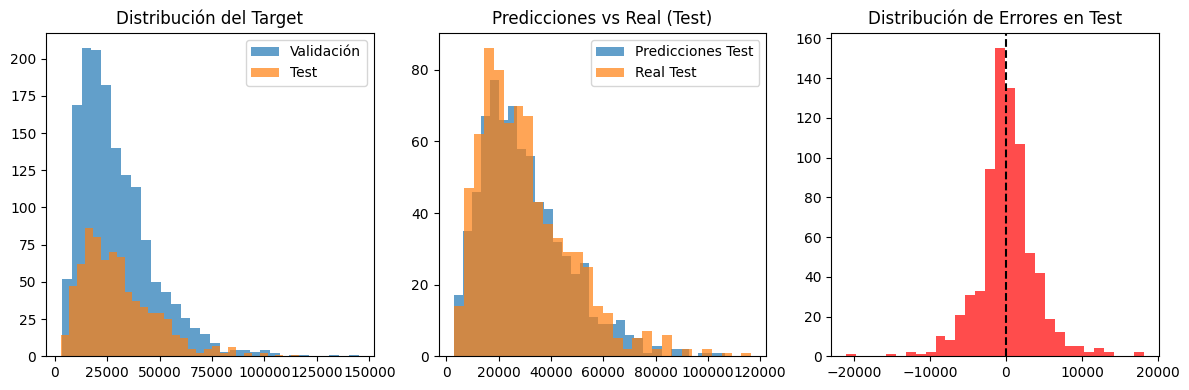

In [76]:
import pandas as pd
from sklearn.metrics import mean_absolute_error
import xgboost as xgb

# 1. Tabla resumen del MAE en validación
resumen_modelos = pd.DataFrame({
    'Modelo': [
        'DummyRegressor (Baseline)',
        'XGBRegressor (Default)',
        'XGBRegressor + Monotonicidad',
        'XGBRegressor + Optuna',
        'XGBRegressor + Prunning'
    ],
    'MAE_Validación': [
        mae_dummy,
        mae_xgb,
        mae_xgb_mono,
        best_mae,
        best_mae_pruning
    ],
    'Descripción': [
        'Modelo baseline con predicción por promedio',
        'XGBoost con parámetros por defecto',
        'XGBoost con restricción monótona en precio',
        'XGBoost optimizado con Optuna (5 min)',
        'XGBoost optimizado con Prunning (5 min)'
    ]
})

# Ordenar por mejor MAE
resumen_modelos = resumen_modelos.sort_values('MAE_Validación')
resumen_modelos['Ranking'] = range(1, len(resumen_modelos) + 1)

print(resumen_modelos.to_string(index=False))
print("\n" + "="*60)

# 2. Identificar el mejor modelo
mejor_modelo_info = resumen_modelos.iloc[0]
print(f"\n2. MEJOR MODELO: {mejor_modelo_info['Modelo']}")
print(f"   MAE en validación: {mejor_modelo_info['MAE_Validación']:.4f}")

# 3. Cargar el mejor modelo y predecir en test
print(f"\n3. EVALUACIÓN EN CONJUNTO DE TEST")

# Cargar el mejor modelo (XGBoost + Optuna de la sección 3)
try:
    with open('modelo_xgb_mono_optuna.pkl', 'rb') as f:
        mejor_pipeline = pickle.load(f)

    # Apply transformations manually and predict with the booster
    X_test_transformed = mejor_pipeline.named_steps['date_extractor'].transform(X_test)
    X_test_processed = mejor_pipeline.named_steps['preprocessor'].transform(X_test_transformed)
    dtest = xgb.DMatrix(X_test_processed)
    y_pred_test = mejor_pipeline.named_steps['regressor'].predict(dtest)

    mae_test = mean_absolute_error(y_test, y_pred_test)

    print(f"Modelo cargado exitosamente: modelo_xgb_mono_optuna.pkl")
    print(f"MAE en conjunto de TEST: {mae_test:.4f}")
    print(f"MAE en conjunto de VALIDACIÓN: {best_mae:.4f}")

except FileNotFoundError:
    print("No se pudo cargar el mejor modelo. Usando XGBRegressor con monotonicidad.")
    # Usar el modelo de la sección 2 as a fallback
    mejor_pipeline = pipeline_xgb_mono
    y_pred_test = mejor_pipeline.predict(X_test)
    mae_test = mean_absolute_error(y_test, y_pred_test)
    print(f"MAE en conjunto de TEST: {mae_test:.4f}")
    print(f"MAE en conjunto de VALIDACIÓN: {mae_xgb_mono:.4f}")


# 4. Análisis de diferencias entre validación y test
print(f"\n4. ANÁLISIS DE DIFERENCIAS ENTRE VALIDACIÓN Y TEST")

diferencia_mae = mae_test - best_mae
porcentaje_diferencia = (diferencia_mae / best_mae) * 100

print(f"Diferencia absoluta en MAE: {diferencia_mae:+.4f}")
print(f"Diferencia porcentual: {porcentaje_diferencia:+.2f}%")

if abs(porcentaje_diferencia) < 5:
    print("La diferencia es menor al 5% - El modelo generaliza bien")
elif abs(porcentaje_diferencia) < 10:
    print("La diferencia está entre 5-10% - Generalización aceptable")
elif abs(porcentaje_diferencia) < 20:
    print("La diferencia está entre 10-20% - Posible sobreajuste moderado")
else:
    print("La diferencia es mayor al 20% - Posible sobreajuste significativo")


# Estadísticas adicionales de los conjuntos
print(f"\nESTADÍSTICAS ADICIONALES:")
print(f"Tamaño conjunto validación: {len(y_val)} muestras")
print(f"Tamaño conjunto test: {len(y_test)} muestras")
print(f"Media de target en validación: {y_val.mean():.2f}")
print(f"Media de target en test: {y_test.mean():.2f}")

# Gráfico comparativo de distribuciones
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.hist(y_val, alpha=0.7, label='Validación', bins=30)
plt.hist(y_test, alpha=0.7, label='Test', bins=30)
plt.title('Distribución del Target')
plt.legend()

plt.subplot(1, 3, 2)
plt.hist(y_pred_test, alpha=0.7, label='Predicciones Test', bins=30)
plt.hist(y_test, alpha=0.7, label='Real Test', bins=30)
plt.title('Predicciones vs Real (Test)')
plt.legend()

plt.subplot(1, 3, 3)
errors_test = y_test - y_pred_test
plt.hist(errors_test, bins=30, alpha=0.7, color='red')
plt.title('Distribución de Errores en Test')
plt.axvline(x=0, color='black', linestyle='--')

plt.tight_layout()
plt.show()


El mejor modelo fue XGBRegressor + Optuna, el cual tuvo el mejor rendimiento.
El modelo tuvo un MAE de validación de 2547.9526 y un MAE test 2580.8208.


Si existen diferencias entre los modelos.
- La diferencia absoluta del MAE es de +32.8682
- Diferencia porcentual: +1.29%
Como la diferencia es menor al 5% el modelo generaliza bien


¿POR QUÉ PUEDEN EXISTIR DIFERENCIAS?
- Muestreo diferente: Validación y test son subconjuntos distintos del dataset
- Sobreajuste: El modelo puede haberse especializado en patrones específicos de validación
- Variabilidad natural: Los datos de test pueden tener distribuciones ligeramente diferentes
- Ruido en los datos: Características no capturadas por el modelo que afectan más a test
- Tamaño de muestra: Conjuntos pequeños pueden mostrar mayor variabilidad

# Conclusión
Exito!
<p align="center">
  <img src="https://i.pinimg.com/originals/55/3d/42/553d42bea9b10e0662a05aa8726fc7f4.gif">
</p>